# PHYS 267 - Chapter 5<br><font color='blue'>Discrete & Continuous Probability Distributions</font>
###### Last Updated: Jan 9, 2023 by Dr. Brenda Lee
***

### <font color="blue">5.1 Chapter Overview</font>

So far, we have learnt that *variables* can be *quantitative* when generating numerical data, or *qualitative* when generating categorical data. These were defined as characteristics that change or vary over time for different elements under consideration. 

But for physicists like  us, we typically build models for the phenomena we wish to study so that we can make predictions and decisions based on our analysis. For example, *how many collisions will take place at this location over a certain period of time*?

To answer questions of this nature, scientists must define a characteristic they are measuring or counting as a variable that changes randomly - we call these **random variables**. We will start our discussion with random variables, and then go through various different probability distributions in the next few subchapters.

<div class="alert alert-block alert-info">💎<b>Chapter Objectives</b>:<br>
    <ol>
        <li>Define the two types of random variables: discrete vs. continuous</li>
        <li>Describe, plot and calculate probabilities for discrete vs. continuous probability distributions</li>
    </ol>
</div>

### <font color="blue">5.2 Types of Random Variables</font>

Let's call $X$ a **random variable** - what does this mean? We use $X$ to represent any variable that will vary or change depending on the outcome of the experiment being measured. We can toss a die and measure $X$ to be the number observed on the upper face; that means $X$ can be either 1, 2, 3, 4, 5 or 6 depending on the *random outcome* of the experiment. 

But apart from that, we can further describe random variables as either discrete or continuous. 
- If the possible outcomes of a random variable can be listed out using whole numbers, we call this variable **discrete**
    - There are *finite discrete random variables* that have a fixed number of possible values
    - There are *countably infinite discrete random variables* where we can list out the values specifically, but with no specific end (ie. list the number of accidents occurring at a certain roundabout over a 10-year period; we can't really list them all very easily...)
- If the possible outcomes of a random variable can only be described using an interval of real numbers (ie. from zero to infinity), then the random variable is called **continuous**
    - These typically represent measurements ranging from time, weight, velocity, position, etc.
    - These are all considered *uncountably infinite*, as in there are too many possible values to list and/or count but they can be measured with high precision

Depending on which type of random variable you have, you can have different probability distributions that are common to each type of variable.

### <font color="blue">5.3 Discrete Probability Distributions</font>

A **probability distribution** is simply a *relative frequency distribution* for a random variable $X$ constructed for an entire population of measurements. We are essentially plotting the probability $p(x)$ vs. $x$. These probability functions will vary depending on whether you have discrete or continuous random variables. We will go through these two separately and present the most common distributions from each, starting with discrete probability distributions. 

The **probability distribution for a discrete random variable** is a formula, table or graph that gives the possible values of $X$ and the probability $p(x)$ associated with each value of $x$.
- For a given discrete distribution, your $p(x)$ function is called the **probability mass function (PMF)** of that distribution. 

The requirements for a discrete probability distrubutions are as follows:
1. $0\le p(x) \le 1$ - individual probabilities must be between 0 and 1
2. $\sum p(x)=1$ - all probabilities must add up to 1

These look pretty similar to the requirements for relative frequencies! This means that we can easily form a *probability histogram* as well!

We will now go through several key probability distributions you should know of moving forward. Of signifiance are the binomial and Poisson distributions. 

#### 5.3.1 Uniform Probability Distribution

Although rare in real life, a **discrete uniform probability distribution** is one where your PMF is a constant; every value has an equal chance of taking place. This means that you have a flat top to your probability distribution. We can define the PMF as follows, with $n$ being the total number of possible events.

$$p(x) = \frac{1}{n}$$

A good example of this would be when you roll a die numerous times. With 6 faces to the die, you will have 6 bins in your horizontal axis, each with a probability of $p(x) = 1/6$. 

To calculate the PMF and plot the points on a histograph or graph, we can use a `randint` and `pmf` function from SciPy.

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


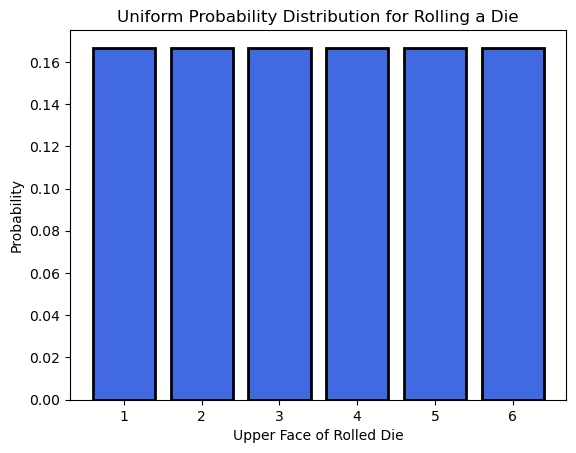

In [7]:
# Example of Uniform Probability Distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

a, b = 1, 6     # Define lowest value and highest value
x = np.arange(a, b+1)    # Create x-values 1, 2, 3, 4, 5, 6
discrete_uniform_dist = randint(a, b+1)    # Creates uniform continuous random variable
discrete_uniform_pmf = discrete_uniform_dist.pmf(x)     # Gives you probability vallue
print(discrete_uniform_pmf)  # To verify probabilities for each x-value

plt.bar(x, discrete_uniform_pmf, color="royalblue", edgecolor='black', linewidth=2)
plt.xlabel('Upper Face of Rolled Die')
plt.ylabel('Probability')
plt.title('Uniform Probability Distribution for Rolling a Die')
plt.show()

#### 5.3.2 Binomial Probability Distribution

You have probably heard of a binomial distribution, but what does it mean and where does it come from? Let's first define what a **binomial experiment** is:
- The experiment consists of $n$ identical trials
- Each trial results in one of two outcomes, which we can call a success $S$ or failure $F$. Since there are two outcomes only, we know that we are working with a **binomial random variable**. 
- The probability of $S$ on a single trial is equal to $p$ while the probability of failure is equal to $q=1-p$. These are consistent from trial to trial.
- The trials are independent of each other
- We are interested in finding $x$, the number of successes observed during $n$ trials for a range of discrete $x$-values.

All five of these characteristics must be satisfied in order to call your experiment 'binomial'. A general rule of thumb is that if the sample size is large relative to the population size ($n/N\ge 0.05$), then the resulting experiment is *not* binomial*. For example, if you have a small population size $N$, then your probability of success $p$ will change dramatically from trial to trial.

<font color="green">**Example 1**: A patient fills a prescription for a 10-day regimen of two pills daily. Unknown to the pharmacist and the patient, the 20 tablets consist of 18 pills of the prescribed medication and 2 pills that are the generic equivalent of the prescribed medication. The patient selects two pills at random for the first day's dosage. If we check the selection and record the number of pills that are generic, is this a binomial experiment?</font>

<font color="darkgreen">**Solution**: Let's check the sampling procedure to ensure we have a binomial experiment:
1. The experiment has $n=2$ trials since the patient is selecting 2 pills daily from a pool of 20. This is satisfied.
2. Each trial only has one of two outcomes: prescribed vs. generic. This is satisfied.
3. The pills are supposedly mixed randomly in the bottle. The probability of drawing a generic pill is always 2/20 and that of a prescribed pill is 18/20. This is satisfied.
4. The trials are **dependent** on each other because the probability of drawing a generic pill is 2/20 in the 1st pick and either 1/19 or 2/19 in the 2nd pick if the patient picks the generic pill or prescribed pill first, respectively. This **is not satisfied and therefore this experiment is NOT binomial**.</font>

But, if you know you have a binomial experiment, then we can construct a **binomial probability distribution**. 

<div class="alert alert-info">
  <strong>Binomial Probability Distribution: </strong>A binomial experiment consists of $n$ identical trials with probability of success $p$ on each trial and failure $q = 1-p$. The probability of $k$ successes in $n$ trial is given as:<br>
    $$P = C_n^k p^k q^{n-k} = \frac{n!}{k!(n-k)!}p^k q^{n-k}$$
</div>

If we take a look at our formuals for $\mu, \sigma^2, \sigma$ from previous chapters, we can derive simpler formulas for the numerical measures of this distribution:
- The **binomial mean** is given by $\mu=np$
- The **binomial variance** is given by $\sigma^2 = npq$
- The **binomial standard deviation** is given by $\sigma = \sqrt{npq}$

Now, let's try to plot a binomial distribution using the `binom` and `matplotlib.pyplot` packages of Python.

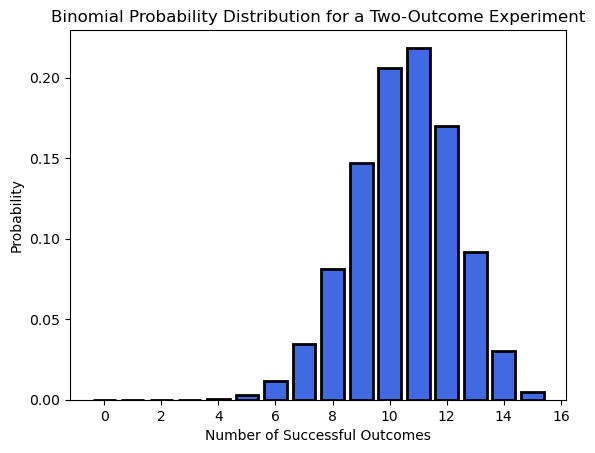

Binomial Mean: 10.5
Binomial Variance: 3.1500000000000004
Binomial Standard Deviation: 1.7748239349298849


In [8]:
# Example of Binomial Distribution

from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 15, 0.7   # Given n trials, with probability of success being 70%
x_values = list(range(n+1))   # Creating a list of x-values
binom_pmf = [binom.pmf(x, n, p) for x in x_values]   # Create list of PMF values
plt.bar(x_values, binom_pmf, color="royalblue", edgecolor='black', linewidth=2)   # Plot distribution
plt.xlabel('Number of Successful Outcomes')
plt.ylabel('Probability')
plt.title('Binomial Probability Distribution for a Two-Outcome Experiment')
plt.show()

# Calculate mean, variance and standard deviation
binom_mean, binom_var, binom_std = binom.mean(n,p), binom.var(n,p), binom.std(n,p)
print("Binomial Mean:", binom_mean)
print("Binomial Variance:", binom_var)
print("Binomial Standard Deviation:", binom_std)

#### 5.3.3 Poisson Probability Distribution

Another popular discrete random variable that has numerous applications is the Poisson random variable. The **Poisson random variable** gives a probability distribution that effectively models data that presents the number of occurrences of a specified event in a given unit of time or space. Examples are as follows:
- Number of particles per small volume of fluid
- Number of instrumentation breakdowns during a given day
- Number of phone calls received at your house during a given period of time

No matter which example you choose, $X$ will represent the number of events that occur in a period of time or space, during which an average of $\mu$ such events can be expected to occur. The only condition and assumption required when applying the Poisson distribution is that the events occur **randomly and independently** of one another.

If we can model an experiment through a Poisson distribution, then we can construct a **Poisson probability distribution**. 

<div class="alert alert-info">
  <strong>Poisson Probability Distribution: </strong>If $\mu$ is the average number of times that an event occurs in a certain period of time or space, then the probability of $k$ occurrences of this event is given by:<br>
    $$P(X=k) = \frac{\mu^k e^{-\mu}}{k!}$$
</div>

The numerical measures of a Poisson distribution can be simplified to the following:
- The **Poisson mean** is given by $\mu$
- The **Poisson standard deviation** is given by $\sigma = \sqrt{\mu}$

Now, let's try to plot a binomial distribution using the `binom` and `matplotlib.pyplot` packages of Python.

<font color="green">**Example 2**: The average number of traffic accidents on a certain section of highway is two per week. Assume that the number of accidents follows a Poisson distribution with an average of 2. Find the probability of no accidents on this section of highway during a 1-week period.</font>

<font color="darkgreen">**Solution**: We are given $\mu = 2$ as the average number of accidents per week. This means that:
$$P(X=0) = \frac{2^0 e^{-2}}{0!} = e^{-2} = 0.135335$$
</font>

The SciPy package has a `poisson` module we can use to our advantage when plotting Poisson distributions and getting numerical measures.

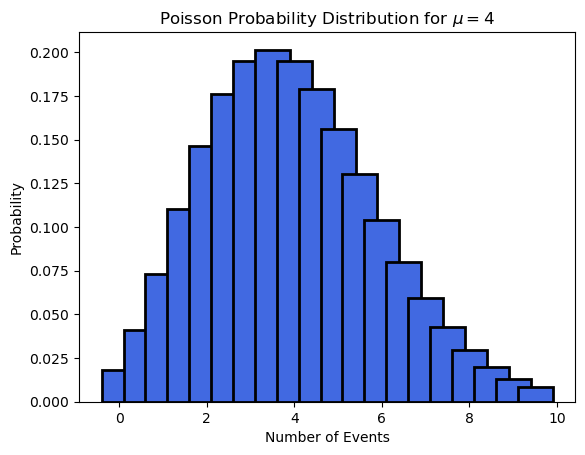

Poisson Mean: 4.0
Poisson Variance: 4.0
Poisson Standard Deviation: 2.0


In [9]:
# Example of Poisson Distribution

from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

mu = 4   # Given n trials, with average of mu = 4
xp_values = np.arange(0, 10, 0.5)
poisson_pmf = poisson.pmf(xp_values, mu)
plt.bar(xp_values, poisson_pmf, color="royalblue", edgecolor='black', linewidth=2)   # Plot distribution
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Probability Distribution for $\mu = 4$')
plt.show()

# Calculate mean, variance and standard deviation
poisson_mean, poisson_var, poisson_std = poisson.mean(mu), poisson.var(mu), poisson.std(mu)
print("Poisson Mean:", poisson_mean)
print("Poisson Variance:", poisson_var)
print("Poisson Standard Deviation:", poisson_std)

Now that we know how to graph a Poisson distribution, are there any tools we can use to help us solve questions related to the Poisson distribution? For sure!

<font color="green">**Example 3**: The Physics building is home to 275 students per day on average. What is the probability that the Physics building has exactly 300 students in a given day?</font>

<font color="darkgreen">**Solution**: We can use the `poisson` module from SciPy. We can use the `pmf` function with the values $k=300$ and $\mu=275$.
</font>

In [10]:
from scipy.stats import poisson
print("The probability is given as:", poisson.pmf(k=300, mu=275))

The probability is given as: 0.007638755016054779


<font color="green">**Example 4**: The Physics building is home to 275 students per day on average. What is the probability that the Physics building has over 300 students in a given day?</font>

<font color="darkgreen">**Solution**: We can use the `poisson` module from SciPy. We can use the `cdf` function with the values $k=300$ and $\mu=275$, knowing that the C represents "cumulative" to sum up all probabilities that are less than some value.
</font>

In [11]:
from scipy.stats import poisson
print("The probability is given as:", 1 - poisson.cdf(k=300, mu=275))

The probability is given as: 0.06366423940747667


From the above examples, we know that the Poisson probability distribution is simple and easy to work with. But what's even more useful is its ability to **approximate the binomial distribution** when $n$ is large and $\mu = np$ is small, preferably with $np<7$. This is something useful to keep in mind when it is difficult modeling something with the binomial distribution.

### <font color="blue">5.4 Continuous Probability Distributions</font>

In the previous section, we learnt about discrete random variables and their probability distributions. Now, let's focus on continuous random variables and their distributions. Specifically, the normal or Gaussian probability distribution. 

Now, what are **continuous random variables**? They can be anything from heights and weights to experimental measurement errors. What's most important is that they can assume infinitely many values corresponding to points on a line interval. So, how do we plot these and how will they look different than discrete probability distributions?

Whereas discrete probability distributions relied on relative frequency histograms, continuous probability distributions can be modelled by continuous functions. Starting from a relative frequency histogram, as the sample size increases, we would have smaller and smaller bins that may be modelled by a curve. We call this the **probability density function (PDF)**, which is described by a mathematical formula $f(x)$, and the area underneath this curve is the probability between your bounds; easily represented by an integral.

Characteristics of a **continuous probability distribution** are as follows:
- The area under a continuous probability distribution is equal to 1
- The probabiliy that $X$ will fall into a particular interval is equal to the area under the curve between two points $a$ and $b$
- $P(X=a) = 0$ for continuous random variables
    - This implies that $P(X\ge a) = P(X>a)$ and $P(X\le a) = P(X<a)$
    - This is *not* true for discrete random variables, generally speaking!
    
The only problem now is... what function should we choose to model our continuous distribution? Although there are automated ways that we will present later on in a modelling and line of best fit chapter, let's go through some common distributions first and get used to plotting them.

#### 5.4.1 Uniform Probability Distribution

A **uniform random variable** can be used to model the behaviour of a continuous random variable whose values are uniformly distributed over a given interval. One example in Physics is a measurement error - let's say a rounding error when using a ruler. The error is consistent throughout all measurements, so that variable will have a flat curve, where $f(x) = c$ and $c$ is some constant.

<div class="alert alert-info">
  <strong>Uniform Continuous Probability Distribution: </strong>If $c$ is a constant, the PDF is given by:$$f(x) = c$$
</div>

What will the probability distribution look like? Let's try using `scipy.stats.uniform` to find out.

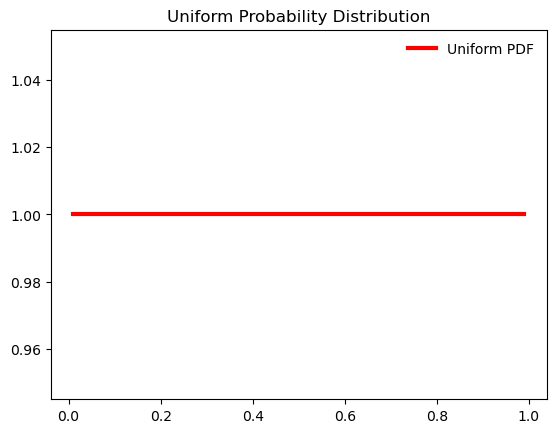

In [12]:
# Example of Continuous Uniform Distribution

from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

fig_uni, ax_uni = plt.subplots(1,1)
# The percent point function ppf() takes a % and returns a standard deviation multiplier 
# for what value the % occurs at
x_uni = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax_uni.plot(x_uni, uniform.pdf(x_uni), 'r-', lw=3, label="Uniform PDF")
ax_uni.set_title("Uniform Probability Distribution")
ax_uni.legend(loc='best', frameon=False)
plt.show()

#### 5.4.2 Exponential Probability Distribution

<div class="alert alert-info">
  Another common distribution is the <strong>Exponential Probability Distribution</strong>, given by the following PDF:<br>
    $$f(x) = \frac{1}{\mu}e^{-x/\mu}, \qquad 0\le x \le \infty, \qquad \mu>0$$<br>
    For any given value of $\mu$, the probability of a given interval can be easily computed such that for $a>0$:<br>
    $$P(x>a) = e^{-a/\mu}$$
</div>

<font color="green">**Example 5**: The magnitude of most earthquakes is measureed on the Richter scale. It was invented in 1934. Using this scale, a magnitude 5-5.9 is termed as a moderate earthquake with slight damage to buildings and structures. Suppose the magnitude of earthquakes in a region of Indonesia can be modelled exponentially with a mean of 4. Find the probability that the next earthquake to hit this region will exceed 4 on the Richter scale.</font>

<font color="darkgreen">**Solution**: We have $\mu=4$ and $x$ being greater than 4. We can use the exponential PDF:
   $$P(x>4) = e^{-4/4} = e^{-1} = 0.37$$
</font>

Now, let's try to graph an exponential probability distribution using the `expon` function of SciPy.

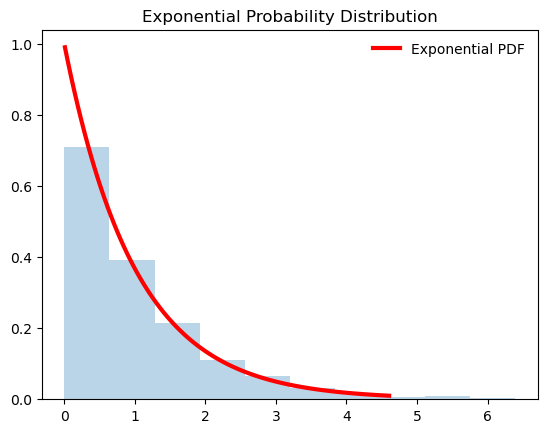

In [13]:
# Example of Continuous Exponential Distribution

from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

# Plot exponential function
fig_exp, ax_exp = plt.subplots(1,1)
x_exp = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax_exp.plot(x_exp, expon.pdf(x_exp), 'r-', lw=3, label="Exponential PDF")

# Plot normalized histogram with random values in Exp function
r_exp = expon.rvs(size=1000)
ax_exp.hist(r_exp, density=True, alpha=0.3)   # Density normalizes bin heights so integral of histogram is 1
ax_exp.set_title("Exponential Probability Distribution")
ax_exp.legend(loc='best', frameon=False)
plt.show()

#### 5.4.3 Normal Probability Distribution

Whether it be human heights, cluster star velocities, or the distribution of the last four digits of phone numbers in a phone directory; all these variables show a symmetrical, "bell-curve" shape that is called the **Gaussian distribution** after Carl Friedrich Gauss, often referred to as the **normal distribution**. Why is it "normal"? Because it happens so often in Nature, such as the distribution of molecular velocities. 

<div class="alert alert-info">
  <strong>Normal or Gaussian Distribution</strong>: Naturally, occurring, the PDF that represents this distribution is given by:<br>
    $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2 / (2\sigma^2)}, \qquad -\infty < x < \infty$$
    where $\mu$ and $\sigma$ are the parameters that represent the population mean and standard deviation, respectively.
</div>

How is the shape of the normal distribution affected by its parameters?
- $\mu$ locates the centre of the distribution, and the distribution must be *symmetric* about its mean $\mu$
    - This symmetry implies that the area to the right of $\mu$ is 0.5, and to the left is 0.5
- $\sigma$ determines the *shape* of the distribution, or essentially the height and width of the curve
    - Large values of $\sigma$ will reduce the height of the curve and increase the spread
    - Small values of $\sigma$ will increase the height of the curve and reduce the spread

Let's now explore how to graph a normal distribution using `scipy.stats.norm`!

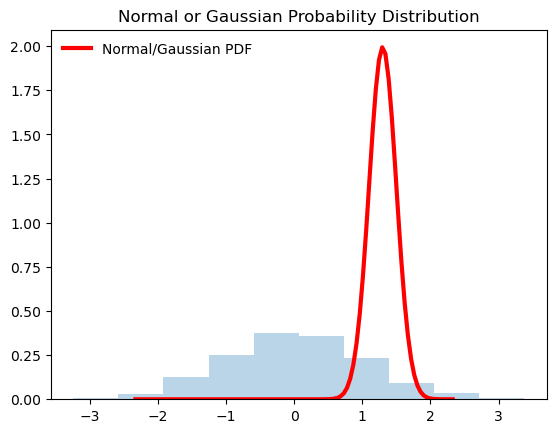

In [14]:
# Example of Normal/Gaussian Distribution

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Plot exponential function
fig_gau, ax_gau = plt.subplots(1,1)
x_gau = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax_gau.plot(x_gau, norm.pdf(x_gau, 1.3, 0.2), 'r-', lw=3, label="Normal/Gaussian PDF")

# Plot normalized histogram with random values in Exp function
r_gau = norm.rvs(size=1000)
ax_gau.hist(r_gau, density=True, alpha=0.3)
ax_gau.set_title("Normal or Gaussian Probability Distribution")
ax_gau.legend(loc='best', frameon=False)
plt.show()

In many cases in Physics, we want to simplify our analysis and the work we need to do. To streamline our operations, we need to learn about a special type of normal distribution called the **standardized normal distribution**. What's special about this is that it's a normal distribution where the mean is 0 and the standard deviation is 1. Values on the left side of the curve are negative, and those on the right are positive. The area under the standard normal curve to the left of a specified value $z$ is the probability up to that spot. How do we define $z$ though? Let's take a look.

First, remember our chapter about numerical measures for quantative variables and the topic of **z-scores**. Any normal distribution can be standardized by simply converting its values into z-scores. These Z-scores will tell us how many standard deviations from the mean each value lies, and allows us to calculate the probability of certain values occuring and to compare different data sets.

We call $z$ the *standardized normal random variable*, given by:

$$z = \frac{X-\mu}{\sigma} \qquad \rightarrow \qquad X = \mu +z\sigma$$

From this formula, we can draw the following conclusions:
- When $X$ is less than the mean $\mu$, the value of $z$ is negative
- When $X$ is greater than the mean $\mu$, the value of $z$ is positive
- When $X = \mu$, the value of $z$ is 0

Later, we will come back to this and discuss $Z$-test and $p$-values for statistics. But for now, let's try to graph this and see how it different from a regular normal distribution.

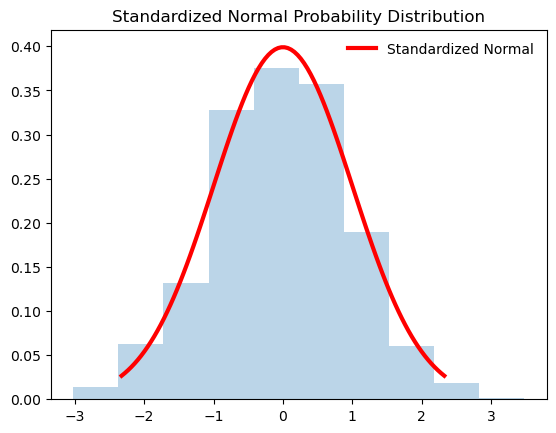

In [15]:
# Example of Standardized Normal/Gaussian Distribution

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Plot exponential function
fig_gau, ax_gau = plt.subplots(1,1)
x_gau = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax_gau.plot(x_gau, norm.pdf(x_gau), 'r-', lw=3, label="Standardized Normal")
# Note we removed the loc= and scale= parameters of norm.pdf to keep it standardized, normally

# Plot normalized histogram with random values in Exp function
r_gau = norm.rvs(size=1000)
ax_gau.hist(r_gau, density=True, alpha=0.3)
ax_gau.set_title("Standardized Normal Probability Distribution")
ax_gau.legend(loc='best', frameon=False)
plt.show()

But, how do we use the normal distribution to determine probabilities. We can do it the manual way, or the automated way. With the manual way, the **cumulative area** is recorded in a typical "areas under the normal curve" table that one can look up. With the automated way, we can apply the following functions:
- Use `scipy.stats.norm.pdf(x, loc=None, scale=None)` with `loc` set to the mean and `scale` to the standard deviation
    - The PDF computes the likelihood of a single point in the distribution
- Use `scipy.stats.norm.cdf(x, loc=None, scale=None)` to find the CDF for an interval up to $x$
    - The CDF copmutes the likelihood of an interval of the distribution
    - If you want an interval from $x$ to $y$, remember to find the difference between the two CDFs
- Note that `loc` and `scale` default to 0 and 1 respectively

In [16]:
# Example of Standardized Normal Probability Calculations

from scipy.stats import norm

# Calculate probability of getting x = 0.8
x_point = 0.8
prob_x = norm.pdf(x_point, loc=0, scale=1)
print("The probability of getting", x_point,"is:", prob_x)

# Calculate probability of getting between 0.5 to 0.8
y_point = 0.5
prob_xy = norm.cdf(x_point, loc=0, scale=1) - norm.cdf(y_point, loc=0, scale=1)
print("The probability of getting a value between", x_point, "and", y_point, "is:", prob_xy)

The probability of getting 0.8 is: 0.28969155276148273
The probability of getting a value between 0.8 and 0.5 is: 0.09668214014259024


### <font color="green">5.5 Practice Problems</font>

Try to answer these problems yourself before the live lectures and tutorials. Feel free to connect with your peers on Discord or on campus if you prefer to work together. If you are struggling with them, we will cover them during live sessions.

#### Problem 5A

Let $X$ be a binomial random variable with $n=7$ and $p=0.3$. Find the following:
1. $P(X=4)$
2. $P(X>1)$
3. $\mu=np$
4. $\sigma=\sqrt{npq}$

#### Problem 5A - Solution

In [26]:
from scipy.stats import binom
n =7 
p = 0.3
pd1 = binom.pmf(4,n,p)
print("P(X=4)=",pd1)
print("P(X>1)=", binom.sf(1,n,p))
print("mean:",binom.mean(n,p))
print("var:", binom.var(n,p))
print("std:", binom.std(n,p))

P(X=4)= 0.09724049999999998
P(X>1)= 0.6705828000000001
mean: 2.1
var: 1.47
std: 1.2124355652982142


#### Problem 5B

Over a long period of time, it has been observed that a Physics student will pull an all-nighter to finish an assignment with probability equal to 0.8. Suppose there are four assignments over the span of four weeks (1 assignment per week). Assume all trials are equal. 
1. What is the probability that the student will pull an all-nighter exactly two times?
2. What is the probability that the student will pull an all-nighter at least once?

#### Problem 5B - Solution

In [30]:
#1. we use binom dist
n2= 4 
p2 = 0.8
print("1. P(X=2)=", binom.pmf(2,n2,p2))
print("2. P(X>=1)=", binom.sf(1,n2,p2)+binom.pmf(1,n2,p2))



1. P(X=2)= 0.1535999999999999
2. P(X>=1)= 0.9984


#### Problem 5C

You are exploring a new habitable planet that has water. Studies have been done there for quite some time. You place a drop of water on a slide and examine it under a microscope. The number $X$ of a particular type of newfound bacteria present has a Poisson probability distribution. Supposed the maximum permissible count per water specimen for this type of bacteria is 5. If the mean count for your water supply is two, and you test a single specimen, is it likely that the count will exceed the maximum permissible count? Explain and show your work. 

#### Problem 5C - Solution

In [31]:
mu_c = 2

print("P(X>5)=",poisson.sf(5,mu_c))

P(X>5)= 0.01656360848061443


#### Problem 5D

Cerebral blood flow (CBF) in the brains of healthy people is normally distributed with a mean of 74 and a standard deviation of 16. 
1. What proportion of healthy people will have CBF readings between 60 and 80?
2. What proportion of health people will have CBF readings above 100?
3. If a person has a CBF reading below 40, that person is classified as at risk for a stroke. What proportion of healthy people will mistakenly be diagnosed as "at risk"?

#### Problem 5D - Solution

In [35]:
mu_d , std_d = 74, 16
z_40 = (40-mu_d)/std_d
z_60 = (60-mu_d)/std_d
z_80 = (80-mu_d)/std_d
z_100 = (100-mu_d)/std_d
print("proability of CBF readings between 60 and 80 is", norm.cdf(z_80)-norm.cdf(z_60))
print("probability of CBF above 100 is", norm.sf(z_100))
print("probability of CBF below 40 is", norm.cdf(z_40))




proability of CBF readings between 60 and 80 is 0.45538281382021306
probability of CBF above 100 is 0.05208127941521953
probability of CBF below 40 is 0.016793306448448803


#### Problem 5E

A book publisher has discovered that the number of words contained in a new manuscript are normally distributed, with a mean equal to 20,000 words in excess of that specified in the author's contract and a standard deviation of 10,000 words. If the publisher wants to be almost certain (probability of 0.95) that the manuscript will have less than 100,000 words, what number of words should the publisher specify in the contract?

#### Problem 5E - Solution

In [38]:
mu_e, std_e = 20000 , 10000
z95 = norm.ppf(0.95)
print("95 percentile z score:", z95)
print("Number of words needed",-((std_e*z95)-100000)-mu_e)

95 percentile z score: 1.6448536269514722
Number of words needed 63551.46373048528


#### Problem 5F

In a futuristic world, a space shuttle touring company finds that 5% of the persons making reservations on a spaceflight will not show up. If they sell 160 tickets for a spaceflight that has only 155 seats, what is the probability that a seat will be available for every person holding a reservation and planning to fly?

#### Problem 5F - Solution

In [40]:
#this a binomial distribution, with n = 160 and probability of not showing up is 0.05
nf,pf = 160,0.05
print("P(X>=5)=", binom.sf(5, nf, pf)+binom.pmf(5,nf,pf))


P(X>=5)= 0.9061460700440682
